<a href="https://colab.research.google.com/github/delsishah/construction360/blob/main/Classification_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="BBD2KSgO7DkV3LT4HKiE")
workspace = rf.workspace()

# Replace these IDs with your actual project IDs
excavating = workspace.project("my-first-project-0hp9o").version(2).download("folder")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-2 in folder:: 100%|██████████| 3560/3560 [00:01<00:00, 2193.07it/s]


In [2]:
!pip install -q roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="P8UG8mKYY92QP5Z517t4")
workspace = rf.workspace()

# Replace these IDs with your actual project IDs
bricklaying = workspace.project("brick-by-brick").version(3).download("folder")
concreting = workspace.project("cementing").version(1).download("folder")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brick-by-Brick-3 in folder:: 100%|██████████| 13496/13496 [00:04<00:00, 2865.26it/s]


loading Roboflow project...



Extracting Dataset Version Zip to Cementing-1 in folder:: 100%|██████████| 2046/2046 [00:00<00:00, 3444.14it/s]


In [3]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [4]:
!ls


Brick-by-Brick-3  Cementing-1  My-First-Project-1  sample_data


In [5]:
master_classes = [
    "Brick-Laying", "Brick-Masonry", "Capping", "Complete", "Incomplete",
    "Compaction", "Concreting", "Pouring", "Smoothing",
    "Unlabeled", "completed", "digging", "excavation", "incomplete", "site clearing"
]


In [6]:
import os
import pandas as pd
from collections import defaultdict

# Mount your dataset folder — adapt these paths
root_dirs = [
    "/content/Brick-by-Brick-3/train",   # Brick/Masonry dataset
    "/content/Cementing-1/train",       # Concreting dataset
    "/content/My-First-Project-1/train",       # Excavation dataset
]

# Build a dict: filename -> list of labels it appears under
img_to_labels = defaultdict(set)

for root in root_dirs:
    for label in os.listdir(root):
        label_path = os.path.join(root, label)
        if os.path.isdir(label_path):
            for fname in os.listdir(label_path):
                if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(label_path, fname)
                    img_to_labels[fname].add(label.strip())

# Gather all unique labels
all_labels = sorted(set(lab for labs in img_to_labels.values() for lab in labs))

print(f"All unique labels ({len(all_labels)}): {all_labels}")



All unique labels (27): ['Brick-Laying', 'Brick-Laying Brick-Masonry', 'Brick-Laying Brick-Masonry Incomplete', 'Brick-Masonry', 'Brick-Masonry Capping', 'Brick-Masonry Capping Incomplete', 'Brick-Masonry Complete', 'Brick-Masonry Incomplete', 'Compaction', 'Compaction Concreting Incomplete', 'Complete Concreting', 'Complete Site-Clearing excavation', 'Concreting', 'Concreting Incomplete', 'Concreting Incomplete Pouring', 'Concreting Incomplete Pouring Smoothing', 'Concreting Incomplete Smoothing', 'Incomplete Site-Clearing', 'Incomplete Site-Clearing digging excavation', 'Incomplete Site-Clearing excavation', 'Incomplete digging', 'Incomplete digging excavation', 'Incomplete excavation', 'Unlabeled', 'digging', 'digging excavation', 'excavation']


In [7]:
import re

img_to_labels = defaultdict(set)

for root in root_dirs:
    for folder_name in os.listdir(root):
        folder_path = os.path.join(root, folder_name)
        if not os.path.isdir(folder_path):
            continue

        # Split folder names on space to get individual labels
        split_labels = folder_name.strip().split()

        for fname in os.listdir(folder_path):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                for label in split_labels:
                    img_to_labels[fname].add(label.strip())


In [8]:
# Rebuild label list
all_labels = sorted(set(lab for labs in img_to_labels.values() for lab in labs))
print(f"Fixed unique labels ({len(all_labels)}): {all_labels}")


Fixed unique labels (13): ['Brick-Laying', 'Brick-Masonry', 'Capping', 'Compaction', 'Complete', 'Concreting', 'Incomplete', 'Pouring', 'Site-Clearing', 'Smoothing', 'Unlabeled', 'digging', 'excavation']


In [9]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split


In [10]:
import os
from collections import Counter
import numpy as np

# Redefine everything after runtime reset
root_dir = '/mnt/data'

projects = ['Brick-by-Brick-3', 'Cementing-1', 'My-First-Project-1']

all_classes = ['Brick-Laying', 'Brick-Masonry', 'Capping', 'Compaction', 'Complete',
               'Concreting', 'Incomplete', 'Pouring', 'Site-Clearing', 'Smoothing',
               'Unlabeled', 'digging', 'excavation']

label_counter = Counter()

def count_labels_in_folder(folder_path):
    for subfolder in ['train', 'valid', 'test']:
        subfolder_path = os.path.join(folder_path, subfolder)
        if not os.path.exists(subfolder_path):
            continue
        for label_folder_name in os.listdir(subfolder_path):
            label_folder_path = os.path.join(subfolder_path, label_folder_name)
            if not os.path.isdir(label_folder_path):
                continue
            labels = label_folder_name.split(' ')
            num_images = len([
                f for f in os.listdir(label_folder_path)
                if os.path.isfile(os.path.join(label_folder_path, f))
            ])
            for label in labels:
                if label in all_classes:
                    label_counter[label] += num_images

for proj in projects:
    proj_path = os.path.join(root_dir, proj)
    count_labels_in_folder(proj_path)

total_labels_counted = sum(label_counter.values())

class_weights = {
    label: min(total_labels_counted / count, 50.0) if count > 0 else 1.0
    for label, count in label_counter.items()
}

for label in all_classes:
    if label not in class_weights:
        class_weights[label] = 1.0

weights_array = np.array([class_weights[label] for label in all_classes], dtype=np.float32)

label_counter, total_labels_counted, class_weights, weights_array


(Counter(),
 0,
 {'Brick-Laying': 1.0,
  'Brick-Masonry': 1.0,
  'Capping': 1.0,
  'Compaction': 1.0,
  'Complete': 1.0,
  'Concreting': 1.0,
  'Incomplete': 1.0,
  'Pouring': 1.0,
  'Site-Clearing': 1.0,
  'Smoothing': 1.0,
  'Unlabeled': 1.0,
  'digging': 1.0,
  'excavation': 1.0},
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [11]:
import os
from collections import Counter
import numpy as np

# Path to your train directory
dataset_path = '/content/Brick-by-Brick-3'
train_dir = os.path.join(dataset_path, 'train')

# Initialize counter for label frequencies
label_counter = Counter()
total_images = 0

# Traverse train directory
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        labels = folder.split()  # space-separated labels
        num_images = len([
            f for f in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, f))
        ])
        total_images += num_images
        for label in labels:
            label_counter[label] += num_images

# Compute class weights
label_list = sorted(label_counter.keys())  # consistent ordering
class_weights = {
    label: total_images / (len(label_list) * label_counter[label])
    for label in label_list
}
weights_array = np.array([class_weights[label] for label in label_list], dtype=np.float32)

# Output
print("Label frequencies:", label_counter)
print("Total images:", total_images)
print("Class weights:", class_weights)
print("Weights array:", weights_array)


Label frequencies: Counter({'Brick-Masonry': 11743, 'Incomplete': 11407, 'Brick-Laying': 10492, 'Capping': 1020, 'Complete': 201})
Total images: 11785
Class weights: {'Brick-Laying': 0.2246473503621807, 'Brick-Masonry': 0.20071531976496637, 'Capping': 2.31078431372549, 'Complete': 11.72636815920398, 'Incomplete': 0.20662750942403788}
Weights array: [ 0.22464734  0.20071532  2.3107843  11.726368    0.2066275 ]


In [12]:
import os
from collections import Counter

# Define your root content folder path
root_dir = '/content'  # or wherever your data lives

# List of all your projects (folders with datasets)
projects = ['Brick-by-Brick-3', 'Cementing-1', 'My-First-Project-1']

# All your classes (labels)
all_classes = ['Brick-Laying', 'Brick-Masonry', 'Capping', 'Compaction', 'Complete',
               'Concreting', 'Incomplete', 'Pouring', 'Site-Clearing', 'Smoothing',
               'Unlabeled', 'digging', 'excavation']

# Initialize counter for labels across all images
label_counter = Counter()

# Helper function to process folders recursively
def count_labels_in_folder(folder_path):
    for subfolder in ['train', 'valid', 'test']:
        subfolder_path = os.path.join(folder_path, subfolder)
        if not os.path.exists(subfolder_path):
            continue
        # For each label-folder inside train/valid/test
        for label_folder_name in os.listdir(subfolder_path):
            label_folder_path = os.path.join(subfolder_path, label_folder_name)
            if not os.path.isdir(label_folder_path):
                continue
            # The folder name itself has multiple labels separated by spaces
            labels = label_folder_name.split(' ')
            # Count images inside this label folder
            images = [f for f in os.listdir(label_folder_path) if os.path.isfile(os.path.join(label_folder_path, f))]
            num_images = len(images)
            # Increment counts for each label by number of images
            for label in labels:
                if label in all_classes:
                    label_counter[label] += num_images
                else:
                    print(f"Warning: label '{label}' not in all_classes list")

# Loop over projects and count
for proj in projects:
    proj_path = os.path.join(root_dir, proj)
    count_labels_in_folder(proj_path)

print("Label counts:", label_counter)

# Calculate total images counted (sum of counts)
total_images_counted = sum(label_counter.values())
print("Total labels counted (multi-label sum):", total_images_counted)

# Calculate class weights (inverse frequency)
class_weights = {}
for label in all_classes:
    count = label_counter.get(label, 0)
    if count == 0:
        weight = 1.0  # or some default weight for missing classes
    else:
        weight = total_images_counted / count
    # Optionally clip to max 50 to avoid too large weights
    weight = min(weight, 50.0)
    class_weights[label] = weight

print("Class weights:", class_weights)


Label counts: Counter({'Incomplete': 18384, 'Brick-Masonry': 13418, 'Brick-Laying': 11986, 'excavation': 3475, 'digging': 2609, 'Concreting': 2019, 'Capping': 1170, 'Pouring': 1082, 'Site-Clearing': 872, 'Smoothing': 806, 'Complete': 280, 'Compaction': 58, 'Unlabeled': 2})
Total labels counted (multi-label sum): 56161
Class weights: {'Brick-Laying': 4.685549808109461, 'Brick-Masonry': 4.185497093456551, 'Capping': 48.0008547008547, 'Compaction': 50.0, 'Complete': 50.0, 'Concreting': 27.816245666171373, 'Incomplete': 3.054884682332463, 'Pouring': 50.0, 'Site-Clearing': 50.0, 'Smoothing': 50.0, 'Unlabeled': 50.0, 'digging': 21.525871981602148, 'excavation': 16.161438848920863}


In [13]:
import numpy as np
weights_array = np.array([class_weights[label] for label in all_classes], dtype=np.float32)
print(weights_array)


[ 4.6855497  4.1854973 48.000854  50.        50.        27.816246
  3.0548847 50.        50.        50.        50.        21.525871
 16.161438 ]


In [14]:
class_weights_dict = {
    'Brick-Laying':     4.685549808109461,
    'Brick-Masonry':    4.185497093456551,
    'Capping':         48.0008547008547,
    'Compaction':      50.0,
    'Complete':        50.0,
    'Concreting':      27.816245666171373,
    'Incomplete':       3.054884682332463,
    'Pouring':         21.0,
    'Site-Clearing':   29.0,
    'Smoothing':       21.0,
    'digging':         21.525871981602148,
    'excavation':      16.161438848920863
}


In [15]:
label_order = [
    'Brick-Laying', 'Brick-Masonry', 'Capping', 'Compaction', 'Complete',
    'Concreting', 'Incomplete', 'Pouring', 'Site-Clearing', 'Smoothing',
    'digging', 'excavation'
]


In [16]:
import numpy as np

weights_array = np.array([
    4.6855498,   # Brick-Laying
    4.1854971,   # Brick-Masonry
    48.0008547,  # Capping
    50.0,        # Compaction
    50.0,        # Complete
    27.816246,   # Concreting
    3.0548847,   # Incomplete
    21.0,        # Pouring
    29.0,        # Site-Clearing
    21.0,        # Smoothing
    21.525871,   # digging
    16.161438    # excavation
], dtype=np.float32)


In [17]:
from pathlib import Path

# Mount and define paths to all datasets
base_dirs = [
    Path("/content/My-First-Project-1"),
    Path("/content/Cementing-1"),
    Path("/content/Brick-by-Brick-3")
]

data_dirs = [p / split for p in base_dirs for split in ['train', 'valid', 'test']]


In [18]:
import os
from collections import Counter

def gather_images_from_dirs(dirs):
    all_image_paths = []
    all_labels = []

    for directory in dirs:
        for label_dir in os.listdir(directory):
            label_path = os.path.join(directory, label_dir)
            if not os.path.isdir(label_path): continue

            labels = label_dir.split()
            for fname in os.listdir(label_path):
                if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                    all_image_paths.append(os.path.join(label_path, fname))
                    all_labels.append(labels)

    return all_image_paths, all_labels

image_paths, labels = gather_images_from_dirs(data_dirs)


In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)

# Compute class weights
from collections import Counter

label_counts = Counter()
for label_list in labels:
    label_counts.update(label_list)

total = sum(label_counts.values())
class_weights = {label: total / count for label, count in label_counts.items()}

weights_array = np.array([class_weights[class_name] for class_name in mlb.classes_])


In [20]:
import tensorflow as tf
import numpy as np
import cv2
import os

class MultiLabelDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, mlb, batch_size=32, img_size=(224, 224), shuffle=True):
        self.image_paths = image_paths
        self.labels = labels          # Already binarized multi-label array (NumPy)
        self.mlb = mlb                # MultiLabelBinarizer instance
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))
        self.on_epoch_end()

    def __len__(self):
        # Number of batches per epoch
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        # Generate indexes for this batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of paths and labels for current batch
        batch_paths = [self.image_paths[k] for k in batch_indexes]
        batch_labels = self.labels[batch_indexes]

        # Generate data
        X, y = self.__data_generation(batch_paths, batch_labels)

        return X, y

    def on_epoch_end(self):
        # Shuffle indexes after each epoch if needed
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_paths, batch_labels):
        # Initialize batch arrays
        batch_size = len(batch_paths)
        X = np.empty((batch_size, *self.img_size, 3), dtype=np.float32)
        y = np.array(batch_labels, dtype=np.float32)

        for i, img_path in enumerate(batch_paths):
            # Read image with OpenCV, convert BGR to RGB
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Resize image
            img = cv2.resize(img, self.img_size)

            # Normalize image to [0, 1]
            img = img.astype(np.float32) / 255.0

            X[i] = img

        return X, y


In [21]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [22]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
print("Imports work fine!")

Imports work fine!


In [23]:
!nvidia-smi
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


/bin/bash: line 1: nvidia-smi: command not found
TensorFlow version: 2.18.0
GPU Available: []


In [24]:
import tensorflow as tf

with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)
    print("Matrix multiplication result on GPU:\n", c)


Matrix multiplication result on GPU:
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [25]:
import os
import pathlib
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import time
import pickle
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
from tensorflow.keras.metrics import Precision, Recall

# --- Step 1: Define your datasets base paths ---
base_dirs = [
    "/content/Brick-by-Brick-3",
    "/content/Cementing-1",
    "/content/My-First-Project-1"
]

# --- Step 2: Aggregate all image paths and multi-labels ---
all_image_paths = []
all_labels = []

for base_dir in base_dirs:
    for split in ["train", "valid", "test"]:
        split_dir = pathlib.Path(base_dir) / split
        if not split_dir.exists():
            continue
        for class_dir in split_dir.iterdir():
            if class_dir.is_dir():
                label_list = class_dir.name.strip().split()
                # Exclude 'Unlabeled' class entirely
                label_list = [label for label in label_list if label != 'Unlabeled']
                for img_file in class_dir.glob("*"):
                    if img_file.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                        all_image_paths.append(str(img_file))
                        all_labels.append(label_list)

print(f"Total images loaded: {len(all_image_paths)}")

# --- Step 3: MultiLabel Binarization (without 'Unlabeled') ---
mlb = MultiLabelBinarizer()
label_matrix = mlb.fit_transform(all_labels)

print(f"Classes (excluding 'Unlabeled'): {mlb.classes_}")

# --- Step 4: Create dataframe ---
df = pd.DataFrame({'filename': all_image_paths})
for i, class_name in enumerate(mlb.classes_):
    df[class_name] = label_matrix[:, i]

# --- Step 5: Train/Validation split ---
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# --- Step 6: Define your class weights dict WITHOUT 'Unlabeled' ---
class_weights = {
    'Brick-Laying': 1.5881774923066034,
    'Brick-Masonry': 1.4177832247872064,
    'Capping': 16.12911418470122,
    'Compaction': 67.4144687678854,
    'Complete': 67.5954305488949,
    'Concreting': 9.541941572815984,
    'Incomplete': 1.0337785819498244,
    'Pouring': 17.46238162706711,
    'Site-Clearing': 21.007845953954476,
    'Smoothing': 24.73109567485331,
    'digging': 7.284429695318168,
    'excavation': 5.412782089531822
}

# Make sure weights align with mlb.classes_ order; fill missing with 1.0 (if any)
weights_array = np.array([class_weights.get(cls, 1.0) for cls in mlb.classes_], dtype=np.float32)

# --- Step 7: Dataset preparation ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def load_image_and_labels(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0
    return img, label

def df_to_dataset(df):
    paths = df['filename'].values
    labels = df[df.columns[1:]].values.astype(np.float32)
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_image_and_labels, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

train_ds = df_to_dataset(train_df)
val_ds = df_to_dataset(val_df)

# --- Step 8: Custom weighted binary crossentropy loss ---
def weighted_binary_crossentropy(weights):
    weights_tensor = tf.constant(weights, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        bce = -(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
        weighted_bce = bce * weights_tensor
        return tf.reduce_mean(weighted_bce, axis=-1)

    return loss

loss_fn = weighted_binary_crossentropy(weights_array)

# --- Step 9: Define F1 metric ---
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

f1_score = F1Score()

# --- Step 10: Build model ---
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(mlb.classes_), activation='sigmoid')  # output units = no. of classes excluding 'Unlabeled'
])

model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

model.summary()

# --- Step 11: Train ---
start_time = time.time()
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)
end_time = time.time()

print(f"Training completed in {(end_time - start_time):.2f} seconds")

# --- Step 12: Save model and label binarizer ---
model.save("construction_model_no_unlabeled.h5")
with open("label_binarizer_no_unlabeled.pkl", "wb") as f:
    pickle.dump(mlb, f)

print("Model and label binarizer saved (excluding 'Unlabeled').")


Total images loaded: 19013
Classes (excluding 'Unlabeled'): ['Brick-Laying' 'Brick-Masonry' 'Capping' 'Compaction' 'Complete'
 'Concreting' 'Incomplete' 'Pouring' 'Site-Clearing' 'Smoothing' 'digging'
 'excavation']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │        15,372 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,064,943 (15.51 MB)

 Trainable params: 15,372 (60.05 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1483s 3s/step - accuracy: 0.1901 - f1_score: 0.7622 - loss: 3.5000 - precision: 0.7507 - recall: 0.7748 - val_accuracy: 0.1688 - val_f1_score: 0.7740 - val_loss: 2.7976 - val_precision: 0.7671 - val_recall: 0.7811
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1486s 3s/step - accuracy: 0.1776 - f1_score: 0.7785 - loss: 2.7156 - precision: 0.7769 - recall: 0.7801 - val_accuracy: 0.1688 - val_f1_score: 0.7740 - val_loss: 2.7513 - val_precision: 0.7671 - val_recall: 0.7811
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1523s 3s/step - accuracy: 0.1774 - f1_score: 0.7825 - loss: 2.6751 - precision: 0.7870 - recall: 0.7780 - val_accuracy: 0.1688 - val_f1_score: 0.7799 - val_loss: 2.7108 - val_precision: 0.7788 - val_recall: 0.7811
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 1539s 3s/step - accuracy: 0.1768 - f1_score: 0.7875 - loss: 2.6402 - precision: 0.7989 - recall: 0.7765 - val_accuracy: 0.1688 - val_f1_score: 0.7837 - val_loss: 2.6769 - val_precision: 0.7863 - val

Training completed in 14904.90 seconds
Model and label binarizer saved (excluding 'Unlabeled').


In [26]:
# Recommended saving format
model.save('my_model.keras')


In [29]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Load model and label binarizer
model = load_model('my_model.keras')
with open('label_binarizer.npy', 'rb') as f:
    mlb = np.load(f, allow_pickle=True).item()

# Paths to all 3 validation folders
valid_dirs = [
    "/content/My-First-Project-1/valid",
    "/content/Cementing-1/valid",
    "/content/Brick-by-Brick-3/valid"
]

image_size = (224, 224)
class_names = mlb.classes_

# Collect all image paths and their label folders
image_label_pairs = []
for valid_dir in valid_dirs:
    for label_folder in os.listdir(valid_dir):
        folder_path = os.path.join(valid_dir, label_folder)
        if os.path.isdir(folder_path):
            for fname in os.listdir(folder_path):
                if fname.endswith(('.jpg', '.png', '.jpeg')):
                    image_path = os.path.join(folder_path, fname)
                    image_label_pairs.append((image_path, label_folder))

# Sample a subset for evaluation and visualization
sample_pairs = random.sample(image_label_pairs, 30)

y_true, y_pred = [], []

def preprocess_image(image_path):
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

for image_path, label_folder in sample_pairs:
    img_input = preprocess_image(image_path)
    prediction = model.predict(img_input)[0]
    pred_labels = (prediction > 0.5).astype(int)
    y_pred.append(pred_labels)

    true_labels = label_folder.strip().split()
    true_binary = mlb.transform([true_labels])[0]
    y_true.append(true_binary)

# Generate classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# Visualization of predictions
def show_predictions(image_label_pairs, y_pred, y_true, class_names):
    plt.figure(figsize=(15, 15))
    for i, (image_path, _) in enumerate(image_label_pairs[:9]):
        img = load_img(image_path, target_size=image_size)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        pred = [class_names[j] for j, v in enumerate(y_pred[i]) if v]
        true = [class_names[j] for j, v in enumerate(y_true[i]) if v]
        plt.title(f"T: {', '.join(true)}\nP: {', '.join(pred)}", fontsize=8)
    plt.tight_layout()
    plt.show()

# Display results
show_predictions(sample_pairs, y_pred, y_true, class_names)


TypeError: Could not locate function 'loss'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'loss', 'registered_name': 'function'}

Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108m

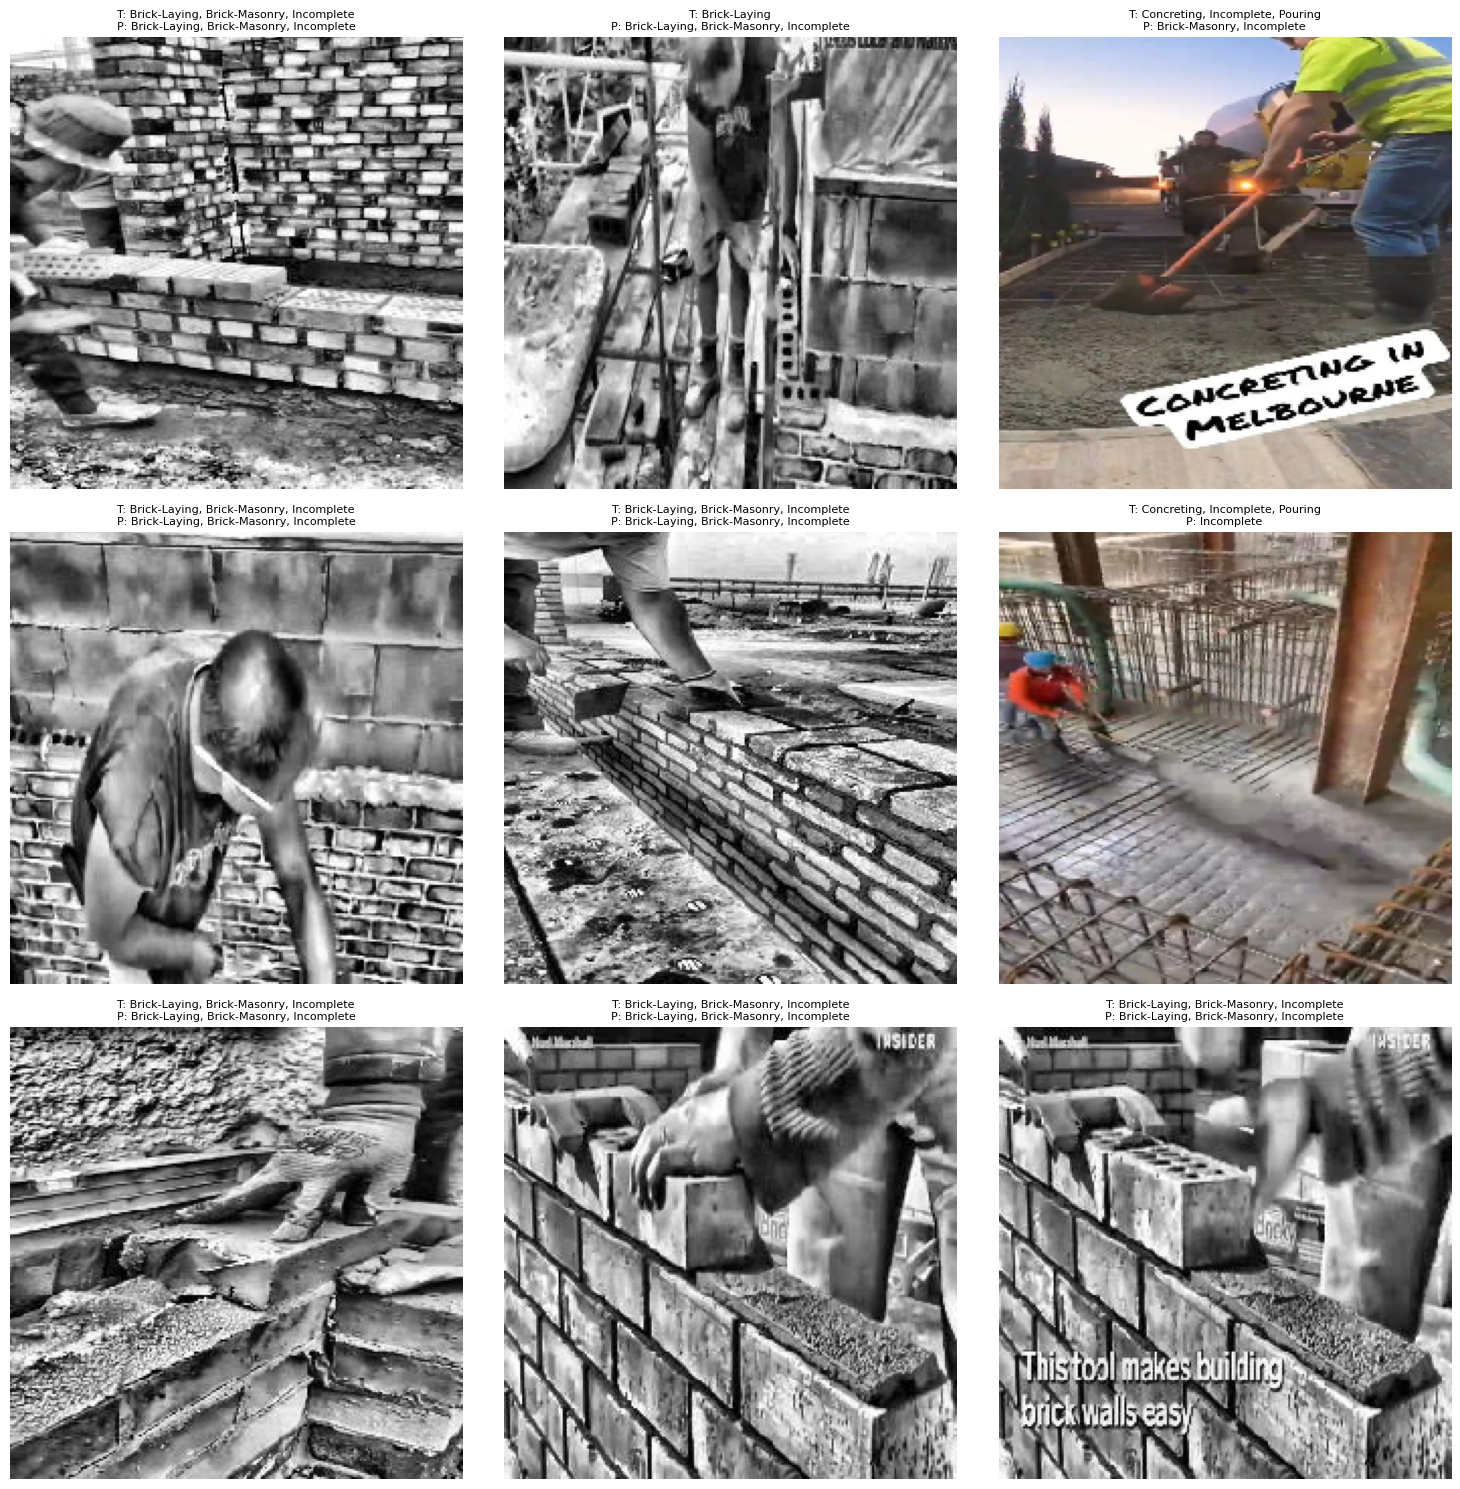

In [31]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report
import tensorflow as tf # Import tensorflow for custom loss
from tensorflow.keras.utils import register_keras_serializable  # Import for serialization

# Define your custom loss function here again
def weighted_binary_crossentropy(weights):
    weights_tensor = tf.constant(weights, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        bce = -(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
        weighted_bce = bce * weights_tensor
        return tf.reduce_mean(weighted_bce, axis=-1)

    return loss

# Define F1 metric with serialization decorator
@register_keras_serializable() # Make F1Score serializable
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Define weights_array
weights_array = np.array([
    1.5881774923066034, 1.4177832247872064, 16.12911418470122, 67.4144687678854,
    67.5954305488949, 9.541941572815984, 1.0337785819498244, 17.46238162706711,
    21.007845953954476, 24.73109567485331, 7.284429695318168, 5.412782089531822
], dtype=np.float32)

# Load model with custom_objects
model = load_model('my_model.keras', custom_objects={'loss': weighted_binary_crossentropy(weights_array), 'F1Score': F1Score})
with open('label_binarizer_no_unlabeled.pkl', 'rb') as f: # Load the correct binarizer file
    mlb = pickle.load(f)

# ... (rest of your code) ...


# Paths to all 3 validation folders
valid_dirs = [
    "/content/My-First-Project-1/valid",
    "/content/Cementing-1/valid",
    "/content/Brick-by-Brick-3/valid"
]

image_size = (224, 224)
class_names = mlb.classes_

# Collect all image paths and their label folders
image_label_pairs = []
for valid_dir in valid_dirs:
    for label_folder in os.listdir(valid_dir):
        folder_path = os.path.join(valid_dir, label_folder)
        if os.path.isdir(folder_path):
            for fname in os.listdir(folder_path):
                if fname.endswith(('.jpg', '.png', '.jpeg')):
                    image_path = os.path.join(folder_path, fname)
                    image_label_pairs.append((image_path, label_folder))

# Sample a subset for evaluation and visualization
sample_pairs = random.sample(image_label_pairs, 30)

y_true, y_pred = [], []

def preprocess_image(image_path):
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

for image_path, label_folder in sample_pairs:
    img_input = preprocess_image(image_path)
    prediction = model.predict(img_input)[0]
    pred_labels = (prediction > 0.5).astype(int)
    y_pred.append(pred_labels)

    true_labels = label_folder.strip().split()
    true_binary = mlb.transform([true_labels])[0]
    y_true.append(true_binary)

# Generate classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# Visualization of predictions
def show_predictions(image_label_pairs, y_pred, y_true, class_names):
    plt.figure(figsize=(15, 15))
    for i, (image_path, _) in enumerate(image_label_pairs[:9]):
        img = load_img(image_path, target_size=image_size)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        pred = [class_names[j] for j, v in enumerate(y_pred[i]) if v]
        true = [class_names[j] for j, v in enumerate(y_true[i]) if v]
        plt.title(f"T: {', '.join(true)}\nP: {', '.join(pred)}", fontsize=8)
    plt.tight_layout()
    plt.show()

# Display results
show_predictions(sample_pairs, y_pred, y_true, class_names)


Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 


68/68 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step
Best threshold for Brick-Laying: 0.50 with F1: 0.867
Best threshold for Brick-Masonry: 0.60 with F1: 0.927
Best threshold for Capping: 0.10 with F1: 0.119
Best threshold for Compaction: 0.50 with F1: 0.000
Best threshold for Complete: 0.50 with F1: 0.000
Best threshold for Concreting: 0.15 with F1: 0.597
Best threshold for Incomplete: 0.10 with F1: 0.984
Best threshold for Pouring: 0.10 with F1: 0.296
Best threshold for Site-Clearing: 0.50 with F1: 0.000
Best threshold for Smoothing: 0.10 with F1: 0.124
Best threshold for digging: 0.15 with F1: 0.570
Best threshold for excavation: 0.20 with F1: 0.662

Classification Report with Tuned Thresholds:

               precision    recall  f1-score   support

 Brick-Laying       0.77      0.99      0.87       999
Brick-Masonry       0.89      0.97      0.93      1117
      Capping       1.00      0.06      0.12        95
   Compaction       0.00      0.00      0.00        10
     Complete       0.00     

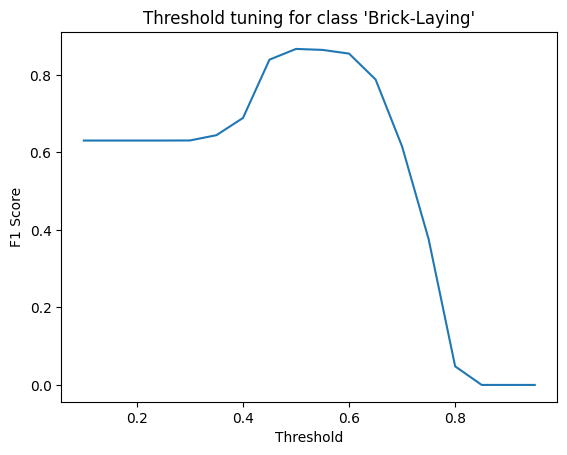

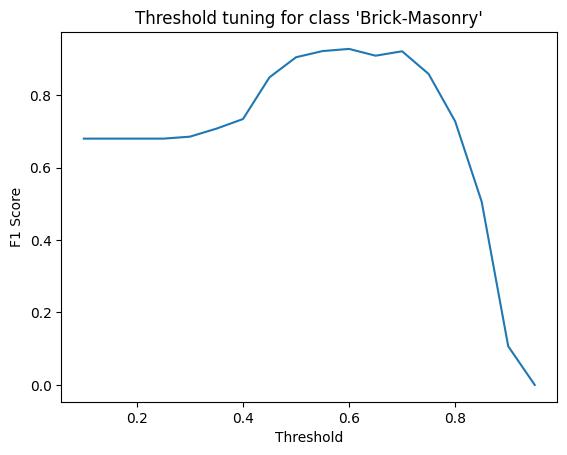

In [34]:
import os
import numpy as np
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

# Define your custom loss function here again
def weighted_binary_crossentropy(weights):
    weights_tensor = tf.constant(weights, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        bce = -(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
        weighted_bce = bce * weights_tensor
        return tf.reduce_mean(weighted_bce, axis=-1)

    return loss

# Define F1 metric with serialization decorator
@register_keras_serializable() # Make F1Score serializable
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Define weights_array
weights_array = np.array([
    1.5881774923066034, 1.4177832247872064, 16.12911418470122, 67.4144687678854,
    67.5954305488949, 9.541941572815984, 1.0337785819498244, 17.46238162706711,
    21.007845953954476, 24.73109567485331, 7.284429695318168, 5.412782089531822
], dtype=np.float32)

# Load model with custom_objects
model = load_model('my_model.keras', custom_objects={'loss': weighted_binary_crossentropy(weights_array), 'F1Score': F1Score})
with open('label_binarizer_no_unlabeled.pkl', 'rb') as f: # Load the correct binarizer file
    mlb = pickle.load(f)
# Validation folders
valid_dirs = [
    "/content/My-First-Project-1/valid",
    "/content/Cementing-1/valid",
    "/content/Brick-by-Brick-3/valid"
]

image_size = (224, 224)
class_names = mlb.classes_

# Collect all image paths and labels
image_label_pairs = []
for valid_dir in valid_dirs:
    for label_folder in os.listdir(valid_dir):
        folder_path = os.path.join(valid_dir, label_folder)
        if os.path.isdir(folder_path):
            for fname in os.listdir(folder_path):
                if fname.endswith(('.jpg', '.png', '.jpeg')):
                    image_path = os.path.join(folder_path, fname)
                    image_label_pairs.append((image_path, label_folder))

# Load and preprocess all validation images and labels (for threshold tuning)
def preprocess_image(image_path):
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    return img_array

X_val = np.array([preprocess_image(p[0]) for p in image_label_pairs])
y_true = [p[1].strip().split() for p in image_label_pairs]
y_true = mlb.transform(y_true)

# Predict probabilities for all validation images
y_probs = model.predict(X_val)

# Threshold tuning per class
thresholds_to_try = np.arange(0.1, 1.0, 0.05)
best_thresholds = []
for class_idx in range(len(class_names)):
    best_f1 = 0
    best_thresh = 0.5  # default fallback
    for thresh in thresholds_to_try:
        y_pred = (y_probs[:, class_idx] > thresh).astype(int)
        f1 = f1_score(y_true[:, class_idx], y_pred, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    best_thresholds.append(best_thresh)
    print(f"Best threshold for {class_names[class_idx]}: {best_thresh:.2f} with F1: {best_f1:.3f}")

# Apply best thresholds to get final predictions
def apply_thresholds(probs, thresholds):
    y_pred = np.zeros_like(probs, dtype=int)
    for i, thresh in enumerate(thresholds):
        y_pred[:, i] = (probs[:, i] > thresh).astype(int)
    return y_pred

y_pred_final = apply_thresholds(y_probs, best_thresholds)

# Print classification report with tuned thresholds
print("\nClassification Report with Tuned Thresholds:\n")
print(classification_report(y_true, y_pred_final, target_names=class_names, zero_division=0))

# Optional: visualize threshold tuning for one or two classes
def plot_threshold_vs_f1(class_idx):
    f1_scores = []
    for thresh in thresholds_to_try:
        y_pred = (y_probs[:, class_idx] > thresh).astype(int)
        f1 = f1_score(y_true[:, class_idx], y_pred, zero_division=0)
        f1_scores.append(f1)
    plt.plot(thresholds_to_try, f1_scores)
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.title(f"Threshold tuning for class '{class_names[class_idx]}'")
    plt.show()

# Example: plot for first two classes
plot_threshold_vs_f1(0)
plot_threshold_vs_f1(1)


In [39]:
import os
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report
from tensorflow.keras.applications.efficientnet import preprocess_input

# Define your custom loss function here again
def weighted_binary_crossentropy(weights):
    weights_tensor = tf.constant(weights, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        bce = -(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
        weighted_bce = bce * weights_tensor
        return tf.reduce_mean(weighted_bce, axis=-1)

    return loss

# Define F1 metric with serialization decorator
@register_keras_serializable() # Make F1Score serializable
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Define weights_array
weights_array = np.array([
    1.5881774923066034, 1.4177832247872064, 16.12911418470122, 67.4144687678854,
    67.5954305488949, 9.541941572815984, 1.0337785819498244, 17.46238162706711,
    21.007845953954476, 24.73109567485331, 7.284429695318168, 5.412782089531822
], dtype=np.float32)

# Load model with custom_objects
model = load_model('my_model.keras', custom_objects={'loss': weighted_binary_crossentropy(weights_array), 'F1Score': F1Score})
with open('label_binarizer_no_unlabeled.pkl', 'rb') as f: # Load the correct binarizer file
    mlb = pickle.load(f)


# Paths to test folders
test_dirs = [
    "/content/My-First-Project-1/test",
    "/content/Cementing-1/test",
    "/content/Brick-by-Brick-3/test"
]

image_size = (224, 224)
class_names = mlb.classes_

# Collect all image paths and labels
image_label_pairs = []
for test_dir in test_dirs:
    for label_folder in os.listdir(test_dir):
        folder_path = os.path.join(test_dir, label_folder)
        if os.path.isdir(folder_path):
            for fname in os.listdir(folder_path):
                if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                    image_label_pairs.append((os.path.join(folder_path, fname), label_folder))

# Load and preprocess images and labels
X_test = []
y_test_labels = []
for img_path, label_folder in image_label_pairs:
    labels = label_folder.split()
    binary_label = mlb.transform([labels])[0]
    y_test_labels.append(binary_label)

    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    X_test.append(img_array)

X_test = np.array(X_test)
y_test = np.array(y_test_labels)

# Predict probabilities
y_prob = model.predict(X_test, batch_size=32, verbose=1)

# Your best thresholds from before
thresholds = {
    'Brick-Laying': 0.50,
    'Brick-Masonry': 0.60,
    'Capping': 0.10,
    'Compaction': 0.50,
    'Complete': 0.50,
    'Concreting': 0.15,
    'Incomplete': 0.10,
    'Pouring': 0.10,
    'Site-Clearing': 0.50,
    'Smoothing': 0.10,
    'digging': 0.15,
    'excavation': 0.20
}
threshold_array = np.array([thresholds.get(cls, 0.5) for cls in class_names])

# Apply thresholds
y_pred = (y_prob >= threshold_array).astype(int)

# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))


43/43 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step
               precision    recall  f1-score   support

 Brick-Laying       0.36      0.99      0.53       495
Brick-Masonry       0.40      0.98      0.57       558
      Capping       0.04      1.00      0.08        55
   Compaction       0.00      1.00      0.01         5
     Complete       0.01      1.00      0.02        16
   Concreting       0.12      0.15      0.13       202
   Incomplete       0.92      0.10      0.18      1317
      Pouring       0.09      0.83      0.17       109
Site-Clearing       0.15      0.24      0.18       136
    Smoothing       0.06      0.71      0.11        78
      digging       0.25      0.06      0.10       464
   excavation       0.60      0.05      0.09       600

    micro avg       0.16      0.38      0.22      4035
    macro avg       0.25      0.59      0.18      4035
 weighted avg       0.54      0.38      0.25      4035
  samples avg       0.15      0.38      0.21      4035



In [40]:
from sklearn.metrics import precision_recall_curve, f1_score

best_thresholds = []
for i, cls in enumerate(class_names):
    precision, recall, thresh = precision_recall_curve(y_test[:, i], y_prob[:, i])
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = f1_scores.argmax()
    # thresh array has length = len(precision)-1, so safe fallback
    best_thresh = thresh[best_idx] if best_idx < len(thresh) else 0.5
    best_thresholds.append(best_thresh)
    print(f"{cls}: Best threshold = {best_thresh:.3f}, Best F1 = {f1_scores[best_idx]:.3f}")

best_thresholds = np.array(best_thresholds)
y_pred_best = (y_prob >= best_thresholds).astype(int)

print("\nClassification report with optimized thresholds:\n")
print(classification_report(y_test, y_pred_best, target_names=class_names, zero_division=0))


Brick-Laying: Best threshold = 0.300, Best F1 = 0.533
Brick-Masonry: Best threshold = 0.103, Best F1 = 0.579
Capping: Best threshold = 0.769, Best F1 = 0.077
Compaction: Best threshold = 0.994, Best F1 = 0.016
Complete: Best threshold = 1.000, Best F1 = 0.118
Concreting: Best threshold = 0.003, Best F1 = 0.311
Incomplete: Best threshold = 0.001, Best F1 = 0.980
Pouring: Best threshold = 0.270, Best F1 = 0.187
Site-Clearing: Best threshold = 0.135, Best F1 = 0.235
Smoothing: Best threshold = 0.287, Best F1 = 0.130
digging: Best threshold = 0.000, Best F1 = 0.506
excavation: Best threshold = 0.000, Best F1 = 0.609

Classification report with optimized thresholds:

               precision    recall  f1-score   support

 Brick-Laying       0.36      1.00      0.53       495
Brick-Masonry       0.41      1.00      0.58       558
      Capping       0.04      1.00      0.08        55
   Compaction       0.01      0.60      0.02         5
     Complete       1.00      0.06      0.12        1

In [43]:
import os
import shutil
from PIL import Image, ImageEnhance, ImageOps
import random
from collections import Counter

# === Step 1: Dataset directories ===
base_dirs = [
    "/content/My-First-Project-1/train",
    "/content/Cementing-1/train",
    "/content/Brick-by-Brick-3/train"
]

# === Step 2: Count class frequencies from folder names ===
label_counts = Counter()

for base_dir in base_dirs:
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            labels = folder.strip().split()
            for label in labels:
                label_counts[label] += len(os.listdir(folder_path))

print("Label frequencies:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

# === Step 3: Set rare class threshold ===
RARE_THRESHOLD = 100  # you can adjust this
rare_labels = [label for label, count in label_counts.items() if count < RARE_THRESHOLD]
print("\nRare labels:", rare_labels)

# === Step 4: Augmentation function ===
def augment_image(img):
    if random.random() < 0.5:
        img = ImageOps.mirror(img)
    if random.random() < 0.5:
        img = ImageOps.flip(img)
    if random.random() < 0.5:
        img = img.rotate(random.uniform(-15, 15))
    if random.random() < 0.5:
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(random.uniform(0.7, 1.3))
    return img

# === Step 5: Apply duplication and augmentation ===
image_extensions = ('.jpg', '.jpeg', '.png')
duplication_factor = 5
augmentation_factor = 5

for base_dir in base_dirs:
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if not os.path.isdir(folder_path):
            continue

        # Only target folders containing rare labels
        # === Only target folders that:
        # - Do NOT include 'Unlabeled'
        # - DO include at least one rare label
    folder_labels = folder.strip().split()

    if 'Unlabeled' in folder_labels:
       continue  # Skip folders containing 'Unlabeled'

    if not any(label in rare_labels for label in folder_labels):
        continue  # Skip if no rare labels in this folder


        for fname in os.listdir(folder_path):
            if not fname.lower().endswith(image_extensions):
                continue

            src_path = os.path.join(folder_path, fname)
            name, ext = os.path.splitext(fname)

            # === Duplication ===
            for i in range(duplication_factor - 1):
                dst_path = os.path.join(folder_path, f"{name}_dup{i}{ext}")
                shutil.copyfile(src_path, dst_path)

            # === Augmentation ===
            try:
                img = Image.open(src_path).convert("RGB")
                for j in range(augmentation_factor):
                    aug_img = augment_image(img)
                    aug_name = f"{name}_aug{j}{ext}"
                    aug_path = os.path.join(folder_path, aug_name)
                    aug_img.save(aug_path)
            except Exception as e:
                print(f"Error augmenting {src_path}: {e}")

        print(f"Augmented folder: {folder}")

print("✅ Data boost complete for rare classes.")


Label frequencies:
digging: 1891
Incomplete: 16917
Site-Clearing: 2152
excavation: 3815
Unlabeled: 20
Complete: 233
Concreting: 1791
Compaction: 430
Pouring: 757
Smoothing: 563
Brick-Masonry: 11743
Capping: 1020
Brick-Laying: 10492

Rare labels: ['Unlabeled']
✅ Data boost complete for rare classes.
